### Imports 


In [11]:
import spacy
import urllib.request
import bs4 as bs 
import nltk
from spacy.matcher import PhraseMatcher 
from IPython.core.display import HTML
from spacy import displacy
from matplotlib.colors import ListedColormap
from wordcloud import WordCloud
from spacy.lang.pt.stop_words import STOP_WORDS
import matplotlib.pyplot as plt

#### >>> !python -m spacy download pt 
#### This is the necessary package to work with the Brazilian Portuguese language library


In [12]:
pln = spacy.load('pt_core_news_sm')
pln

##### loading database text

In [13]:
base_text = urllib.request.urlopen('https://pt.wikipedia.org/wiki/Intelig%C3%AAncia_artificial')

In [14]:
base_text = base_text.read()
base_text


b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-custom-font-size-clientpref-disabled" lang="pt" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Intelig\xc3\xaancia artificial \xe2\x80\x93 Wikip\xc3\xa9dia, a enciclop\xc3\xa9dia livre</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-con

In [15]:
base_text_html = bs.BeautifulSoup(base_text, 'lxml')
base_text_html                                  

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-custom-font-size-clientpref-disabled" dir="ltr" lang="pt">
<head>
<meta charset="utf-8"/>
<title>Inteligência artificial – Wikipédia, a enciclopédia livre</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-desi

In [16]:
paragraph = base_text_html.find_all('p')
paragraph

[<p><b>A Inteligência Artificial</b> (de sigla: <b>IA</b>; do <a href="/wiki/L%C3%ADngua_inglesa" title="Língua inglesa">inglês</a>: <i>Artificial Intelligence</i>, de sigla: <b>AI</b>) é um campo de estudo multidisciplinar que abrange varias áreas do conhecimento.<sup class="reference" id="cite_ref-1"><a href="#cite_note-1"><span>[</span>1<span>]</span></a></sup> Embora seu desenvolvimento tenha avançado mais na ciência da computação, sua abordagem interdisciplinar envolve contribuições de diversas disciplinas. Algumas das principais áreas relacionadas à IA incluem:
 </p>,
 <p>É um conceito amplo e que recebe tantas definições quanto significados diferentes à palavra inteligência.<sup class="reference" id="cite_ref-pt.scribd.com_2-0"><a href="#cite_note-pt.scribd.com-2"><span>[</span>2<span>]</span></a></sup> É possível considerar algumas características básicas desses sistemas, como a capacidade de raciocínio (aplicar <a href="/wiki/Racioc%C3%ADnio_l%C3%B3gico" title="Raciocínio lógi

In [17]:
contents = ' '
for p in paragraph:
    contents += p.text
contents_lower = contents.lower()
contents_lower

' a inteligência artificial (de sigla: ia; do inglês: artificial intelligence, de sigla: ai) é um campo de estudo multidisciplinar que abrange varias áreas do conhecimento.[1] embora seu desenvolvimento tenha avançado mais na ciência da computação, sua abordagem interdisciplinar envolve contribuições de diversas disciplinas. algumas das principais áreas relacionadas à ia incluem:\né um conceito amplo e que recebe tantas definições quanto significados diferentes à palavra inteligência.[2] é possível considerar algumas características básicas desses sistemas, como a capacidade de raciocínio (aplicar regras lógicas a um conjunto de dados disponíveis para chegar a uma conclusão), aprendizagem (aprender com os erros e acertos para que no futuro possa agir de maneira mais eficaz), reconhecer padrões (tanto padrões visuais e sensoriais, como também padrões de comportamento) e inferência (capacidade de conseguir aplicar o raciocínio nas situações do nosso cotidiano).[2]\no desenvolvimento da á

##### In this example I will search for the words: 
### inteligência artificial

In [21]:
string = 'inteligência artificial'
token_search = pln(string)
matcher = PhraseMatcher(pln.vocab)
matcher.add('SEARCH', None, token_search)

In [22]:
doc = pln(contents_lower)
matchers = matcher(doc)

#### Ex:

In [23]:
matchers[0], matchers[0][1], matchers[0][2]

((8661325627334373315, 2, 4), 2, 4)

In [24]:
text_list = ''
word_numbers = 50
display(HTML(f'<h1>{string.upper()}</h1>'))
display(HTML(f'''<p>Results found: </strong>{len(matchers)}</p> '''))
for i in matchers:
    start = i[1] - word_numbers
    if start < 0:
        start = 0
    text_list += str(doc[start:i[2] + word_numbers]).replace(string, f'<mark>{string}</mark>')
    text_list += '<br /><br />'
display(HTML(f'''...{text_list}...'''))
        

#### Named entities

In [25]:
displacy.render(doc, style='ent')

### Word Cloud

In [26]:
color_map = ListedColormap(['red', 'orange', 'yellow', 'green', 'blue', 'magenta'])
cloud = WordCloud(background_color='white', max_words=100, colormap=color_map)

In [27]:
token_list = []
for token in doc:
    token_list.append(token.text)


In [28]:
no_stop_list = []
for word in token_list:
    if pln.vocab[word].is_stop == False:
        no_stop_list.append(word)


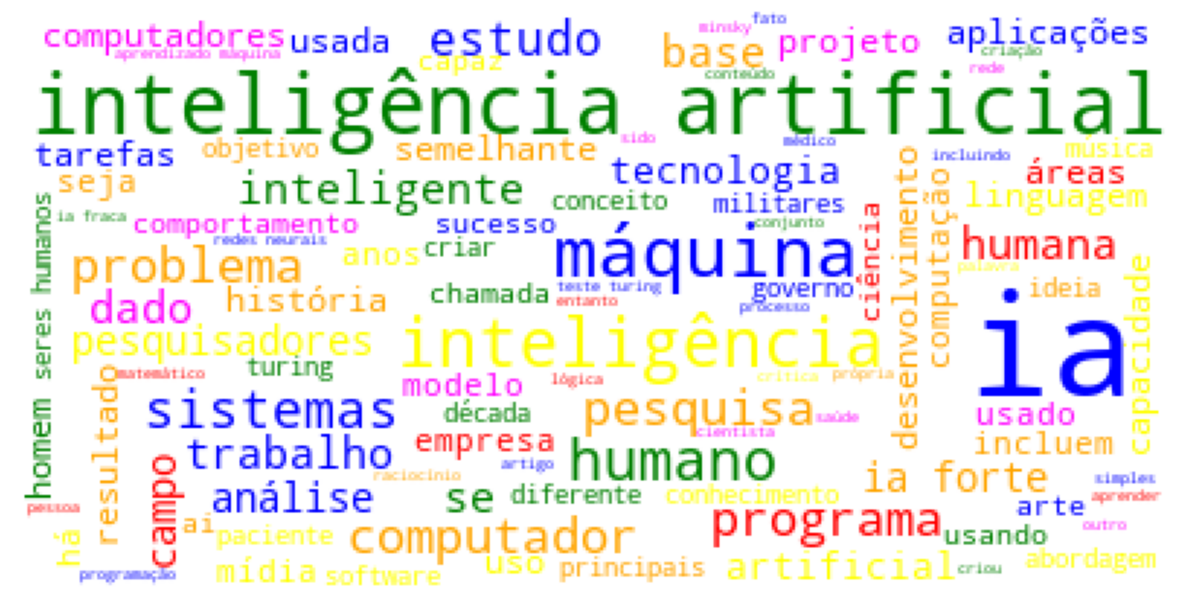

In [29]:
cloud = cloud.generate(' '.join(no_stop_list))
plt.figure(figsize=(15, 15))
plt.imshow(cloud)
plt.axis('off')
plt.show()